In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc
import matplotlib as mpl
from matplotlib import rcParams
import scipy as sci


sc.settings.verbosity = 3
sc.settings.set_dpi(60)
sc.logging.print_version_and_date()

/Users/sophie/miniconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Running Scanpy 0.4.2.post1+3.gcf67e2d on 2018-01-25 00:46.


In [5]:
sc.settings.writedir='/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/write/'

In [6]:
def qc_metrics(adata):
    
    # mean expression per gene
    adata.var["mean"] = adata.X.mean(axis=0).T
    # fraction of 0s per genes
    adata.var["frac_zeros"] = (adata.X.shape[0] - (adata.X > 0).sum(axis=0).T) / adata.X.shape[0]
    
    # for each cell compute fraction of counts in mito genes vs. all genes
    mito_genes = np.array([name for name in adata.var_names if name.startswith('mt-')])
    adata.smp['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
   
    # for each cell compute fraction of counts in ribosomal genes vs. all genes
    ribo_genes = np.array([name for name in adata.var_names if name.startswith('Rp')])
    adata.smp['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

    # total counts and genes per cell
    adata.smp['n_counts'] = np.sum(adata.X, axis=1).A1
    adata.smp['n_genes'] = np.sum(adata.X > 0, axis=1).A1
    print(len(adata.smp_names))
    
    return(adata)

In [7]:
def cell_filter(adata, countmin):
    #filter cells with > countmin number of counts and >1000 genes. Countmin is defined based on the CellRanger output. 
    
    # get cell barcode indices
    res_cells = sc.pp.filter_cells(adata.X,min_counts=countmin,copy=True)
    res_genes = sc.pp.filter_cells(adata.X,min_genes=1000,copy=True)
    res_all = np.array([any(tup) for tup in zip(res_cells[0], res_genes[0])])
    
    # filter
    adata_filt=adata.copy()[res_all,:]
    print(adata_filt.n_smps)
    return(adata_filt)

# WT, FVR and mutant mice

In [28]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/mm10/matrix.mtx'
filename_genes_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/mm10/genes.tsv'
filename_barcodes_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/mm10/barcodes.tsv'

adata_Control_1 = sc.read(filename_data_Control_1, cache=True).transpose()
adata_Control_1.var_names = np.genfromtxt(filename_genes_Control_1, dtype=str)[:, 1]
adata_Control_1.smp_names = np.genfromtxt(filename_barcodes_Control_1, dtype=str)

# raw data (all barcodes)
filename_data_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Control_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_1/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Control_1_raw = sc.read(filename_data_Control_1, cache=True).transpose()
adata_Control_1_raw.var_names = np.genfromtxt(filename_genes_Control_1, dtype=str)[:, 1]
adata_Control_1_raw.smp_names = np.genfromtxt(filename_barcodes_Control_1, dtype=str)

In [31]:
adata_Control_1 = qc_metrics(adata_Control_1)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Control_1.smp['n_counts'])
del adata_Control_1
adata_Control_1 = cell_filter(adata_Control_1_raw, countmin)
del adata_Control_1_raw

3440


In [32]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/mm10/matrix.mtx'   #####two samples were exchanged 
filename_genes_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/mm10/genes.tsv'
filename_barcodes_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/mm10/barcodes.tsv'

adata_Control_2 = sc.read(filename_data_Control_2, cache=True).transpose()
adata_Control_2.var_names = np.genfromtxt(filename_genes_Control_2, dtype=str)[:, 1]
adata_Control_2.smp_names = np.genfromtxt(filename_barcodes_Control_2, dtype=str)


# raw data (all barcodes)
filename_data_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/raw_gene_bc_matrices/mm10/matrix.mtx'   #####two samples were exchanged 
filename_genes_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Control_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_1/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Control_2_raw = sc.read(filename_data_Control_2, cache=True).transpose()
adata_Control_2_raw.var_names = np.genfromtxt(filename_genes_Control_2, dtype=str)[:, 1]
adata_Control_2_raw.smp_names = np.genfromtxt(filename_barcodes_Control_2, dtype=str)

... writing an h5 cache file to speedup reading next time


In [34]:
adata_Control_2 = qc_metrics(adata_Control_2)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Control_2.smp['n_counts'])
del adata_Control_2
adata_Control_2 = cell_filter(adata_Control_2_raw, countmin)
del adata_Control_2_raw

2940
3542


In [35]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/mm10/matrix.mtx'
filename_genes_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/mm10/genes.tsv'
filename_barcodes_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/mm10/barcodes.tsv'

adata_Control_3_FVR = sc.read(filename_data_Control_3_FVR, cache=True).transpose()
adata_Control_3_FVR.var_names = np.genfromtxt(filename_genes_Control_3_FVR, dtype=str)[:, 1]
adata_Control_3_FVR.smp_names = np.genfromtxt(filename_barcodes_Control_3_FVR, dtype=str)

# raw data (all barcodes)
filename_data_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Control_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_3_FVR/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Control_3_FVR_raw = sc.read(filename_data_Control_3_FVR, cache=True).transpose()
adata_Control_3_FVR_raw.var_names = np.genfromtxt(filename_genes_Control_3_FVR, dtype=str)[:, 1]
adata_Control_3_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_Control_3_FVR, dtype=str)

... writing an h5 cache file to speedup reading next time


In [36]:
adata_Control_3_FVR = qc_metrics(adata_Control_3_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Control_3_FVR.smp['n_counts'])
del adata_Control_3_FVR
adata_Control_3_FVR = cell_filter(adata_Control_3_FVR_raw, countmin)
del adata_Control_3_FVR_raw

3766
4416


In [37]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/mm10/matrix.mtx'  #####two samples were exchanged 
filename_genes_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/mm10/genes.tsv'
filename_barcodes_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/mm10/barcodes.tsv'

adata_Control_4_FVR = sc.read(filename_data_Control_4_FVR, cache=True).transpose()
adata_Control_4_FVR.var_names = np.genfromtxt(filename_genes_Control_4_FVR, dtype=str)[:, 1]
adata_Control_4_FVR.smp_names = np.genfromtxt(filename_barcodes_Control_4_FVR, dtype=str)

# raw data (all barcodes)
filename_data_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/raw_gene_bc_matrices/mm10/matrix.mtx'  #####two samples were exchanged 
filename_genes_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Control_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_3_FVR/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Control_4_FVR_raw = sc.read(filename_data_Control_4_FVR, cache=True).transpose()
adata_Control_4_FVR_raw.var_names = np.genfromtxt(filename_genes_Control_4_FVR, dtype=str)[:, 1]
adata_Control_4_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_Control_4_FVR, dtype=str)

... writing an h5 cache file to speedup reading next time


In [38]:
adata_Control_4_FVR = qc_metrics(adata_Control_4_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Control_4_FVR.smp['n_counts'])
del adata_Control_4_FVR
adata_Control_4_FVR = cell_filter(adata_Control_4_FVR_raw,countmin)
del adata_Control_4_FVR_raw

4566
5338


In [39]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/mm10/matrix.mtx' #####two samples were exchanged 
filename_genes_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/mm10/genes.tsv'
filename_barcodes_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/mm10/barcodes.tsv'

adata_Mutant_1 = sc.read(filename_data_Mutant_1, cache=True).transpose()
adata_Mutant_1.var_names = np.genfromtxt(filename_genes_Mutant_1, dtype=str)[:, 1]
adata_Mutant_1.smp_names = np.genfromtxt(filename_barcodes_Mutant_1, dtype=str)

# raw data (all barcodes)
filename_data_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/raw_gene_bc_matrices/mm10/matrix.mtx' #####two samples were exchanged 
filename_genes_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Mutant_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_2/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Mutant_1_raw = sc.read(filename_data_Mutant_1, cache=True).transpose()
adata_Mutant_1_raw.var_names = np.genfromtxt(filename_genes_Mutant_1, dtype=str)[:, 1]
adata_Mutant_1_raw.smp_names = np.genfromtxt(filename_barcodes_Mutant_1, dtype=str)

... writing an h5 cache file to speedup reading next time


In [41]:
### QC and cell filtering
adata_Mutant_1 = qc_metrics(adata_Mutant_1)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Mutant_1.smp['n_counts'])
del adata_Mutant_1
adata_Mutant_1 = cell_filter(adata_Mutant_1_raw, countmin)
del adata_Mutant_1_raw

3386
3949


In [42]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/mm10/matrix.mtx'   
filename_genes_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/mm10/genes.tsv'
filename_barcodes_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/mm10/barcodes.tsv'

adata_Mutant_2 = sc.read(filename_data_Mutant_2, cache=True).transpose()
adata_Mutant_2.var_names = np.genfromtxt(filename_genes_Mutant_2, dtype=str)[:, 1]
adata_Mutant_2.smp_names = np.genfromtxt(filename_barcodes_Mutant_2, dtype=str)

# raw data (all barcodes)
filename_data_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/raw_gene_bc_matrices/mm10/matrix.mtx'   
filename_genes_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Mutant_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_2/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Mutant_2_raw = sc.read(filename_data_Mutant_2, cache=True).transpose()
adata_Mutant_2_raw.var_names = np.genfromtxt(filename_genes_Mutant_2, dtype=str)[:, 1]
adata_Mutant_2_raw.smp_names = np.genfromtxt(filename_barcodes_Mutant_2, dtype=str)

... writing an h5 cache file to speedup reading next time


In [43]:
### QC and cell filtering
adata_Mutant_2 = qc_metrics(adata_Mutant_2)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Mutant_2.smp['n_counts'])
del adata_Mutant_2
adata_Mutant_2 = cell_filter(adata_Mutant_2_raw, countmin)
del adata_Mutant_2_raw

3611
4167


In [44]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/mm10/matrix.mtx'  #####two samples were exchanged 
filename_genes_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/mm10/genes.tsv'
filename_barcodes_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/mm10/barcodes.tsv'

adata_Mutant_3_FVR = sc.read(filename_data_Mutant_3_FVR, cache=True).transpose()
adata_Mutant_3_FVR.var_names = np.genfromtxt(filename_genes_Mutant_3_FVR, dtype=str)[:, 1]
adata_Mutant_3_FVR.smp_names = np.genfromtxt(filename_barcodes_Mutant_3_FVR, dtype=str)

# raw data (all barcodes)
filename_data_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/raw_gene_bc_matrices/mm10/matrix.mtx'  #####two samples were exchanged 
filename_genes_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Mutant_3_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_4_FVR/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Mutant_3_FVR_raw = sc.read(filename_data_Mutant_3_FVR, cache=True).transpose()
adata_Mutant_3_FVR_raw.var_names = np.genfromtxt(filename_genes_Mutant_3_FVR, dtype=str)[:, 1]
adata_Mutant_3_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_Mutant_3_FVR, dtype=str)

... writing an h5 cache file to speedup reading next time


In [45]:
### QC and cell filtering
adata_Mutant_3_FVR = qc_metrics(adata_Mutant_3_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Mutant_3_FVR.smp['n_counts'])
del adata_Mutant_3_FVR
adata_Mutant_3_FVR = cell_filter(adata_Mutant_3_FVR_raw,countmin)
del adata_Mutant_3_FVR_raw

3153
3978


In [46]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/mm10/matrix.mtx'
filename_genes_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/mm10/genes.tsv'
filename_barcodes_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/mm10/barcodes.tsv'

adata_Mutant_4_FVR = sc.read(filename_data_Mutant_4_FVR, cache=True).transpose()
adata_Mutant_4_FVR.var_names = np.genfromtxt(filename_genes_Mutant_4_FVR, dtype=str)[:, 1]
adata_Mutant_4_FVR.smp_names = np.genfromtxt(filename_barcodes_Mutant_4_FVR, dtype=str)

# raw data (all barcodes)
filename_data_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_Mutant_4_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Mutant_4_FVR/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_Mutant_4_FVR_raw = sc.read(filename_data_Mutant_4_FVR, cache=True).transpose()
adata_Mutant_4_FVR_raw.var_names = np.genfromtxt(filename_genes_Mutant_4_FVR, dtype=str)[:, 1]
adata_Mutant_4_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_Mutant_4_FVR, dtype=str)

... writing an h5 cache file to speedup reading next time


In [47]:
### QC and cell filtering
adata_Mutant_4_FVR = qc_metrics(adata_Mutant_4_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_Mutant_4_FVR.smp['n_counts'])
del adata_Mutant_4_FVR
adata_Mutant_4_FVR = cell_filter(adata_Mutant_4_FVR_raw, countmin)
del adata_Mutant_4_FVR_raw

3561
4608


In [50]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/filtered_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/filtered_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/filtered_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR_only = sc.read(filename_data_FVR_only, cache=True).transpose()
adata_FVR_only.var_names = np.genfromtxt(filename_genes_FVR_only, dtype=str)[:, 1]
adata_FVR_only.smp_names = np.genfromtxt(filename_barcodes_FVR_only, dtype=str)

# raw data (all barcodes)
filename_data_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR_only = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_7_FVR_only/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR_only_raw = sc.read(filename_data_FVR_only, cache=True).transpose()
adata_FVR_only_raw.var_names = np.genfromtxt(filename_genes_FVR_only, dtype=str)[:, 1]
adata_FVR_only_raw.smp_names = np.genfromtxt(filename_barcodes_FVR_only, dtype=str)

In [51]:
### QC and cell filtering
adata_FVR_only = qc_metrics(adata_FVR_only)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_FVR_only.smp['n_counts'])
del adata_FVR_only
adata_Control_7_FVR_only = cell_filter(adata_FVR_only_raw,countmin)
del adata_FVR_only_raw

15948
17333


In [52]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/filtered_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/filtered_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/filtered_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR = sc.read(filename_data_FVR, cache=True).transpose()
adata_FVR.var_names = np.genfromtxt(filename_genes_FVR, dtype=str)[:, 1]
adata_FVR.smp_names = np.genfromtxt(filename_barcodes_FVR, dtype=str)


# raw data (all barcodes)
filename_data_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_5_FVR/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR_raw = sc.read(filename_data_FVR, cache=True).transpose()
adata_FVR_raw.var_names = np.genfromtxt(filename_genes_FVR, dtype=str)[:, 1]
adata_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_FVR, dtype=str)

In [53]:
### QC and cell filtering
adata_FVR = qc_metrics(adata_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_FVR.smp['n_counts'])
del adata_FVR
adata_Control_5_FVR = cell_filter(adata_FVR_raw,countmin)
del adata_FVR_raw

7802
8906


In [54]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/filtered_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/filtered_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/filtered_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR = sc.read(filename_data_FVR, cache=True).transpose()
adata_FVR.var_names = np.genfromtxt(filename_genes_FVR, dtype=str)[:, 1]
adata_FVR.smp_names = np.genfromtxt(filename_barcodes_FVR, dtype=str)

# raw data (all barcodes)
filename_data_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_FVR = '/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/Control_6/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_FVR_raw = sc.read(filename_data_FVR, cache=True).transpose()
adata_FVR_raw.var_names = np.genfromtxt(filename_genes_FVR, dtype=str)[:, 1]
adata_FVR_raw.smp_names = np.genfromtxt(filename_barcodes_FVR, dtype=str)

... writing an h5 cache file to speedup reading next time
... writing an h5 cache file to speedup reading next time


In [55]:
### QC and cell filtering
adata_FVR = qc_metrics(adata_FVR)
# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_FVR.smp['n_counts'])
del adata_FVR
adata_Control_6 = cell_filter(adata_FVR_raw, countmin)
del adata_FVR_raw

6041
7574


In [58]:
adata_all=adata_Control_1.concatenate([adata_Control_2, adata_Control_3_FVR, adata_Control_4_FVR,
                                       adata_Mutant_1, adata_Mutant_2, adata_Mutant_3_FVR, adata_Mutant_4_FVR,
                                       adata_Control_5_FVR, adata_Control_6, adata_Control_7_FVR_only],
                                       batch_key='sample',
                                       batch_categories=['Control_1', 'Control_2', 'Control_3_FVR', 'Control_4_FVR',
                                                         'Mutant_1', 'Mutant_2', 'Mutant_3_FVR', 'Mutant_4_FVR',
                                                         'Control_5_FVR', 'Control_6', 'Control_7_FVR_only'])

In [59]:
sc.pp.filter_genes(adata_all, min_cells=20)

In [7]:
adata_all=qc_metrics(adata_all)

67858


In [8]:
adata_all

AnnData object with n_obs × n_vars = 67858 × 16779 
    obs_keys = ['sample', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes']
    var_keys = ['n_cells', 'mean', 'frac_zeros']

In [9]:
adata_all = adata_all[adata_all.obs['percent_mito'] < 0.1, :]

In [11]:
sc.write('/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/scanpy/new_filter_all.h5', adata_all)

### remove immune cells

In [12]:
adata_all_log=sc.pp.log1p(adata_all, copy=True)

In [1]:
sc.write('/Users/sophie/Documents/ICB/Projects/2017_10X_Anika/data/scanpy/new_filter_all_log.h5', adata_all_log)

In [37]:
sc.tl.tsne(adata_all_log)

computing tSNE
    preprocess using PCA with 50 PCs
--> avoid this by setting n_pcs = 0
    using 50 principal components
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:03:34.294):  added
    "X_tsne", tSNE coordinates (adata.smp)


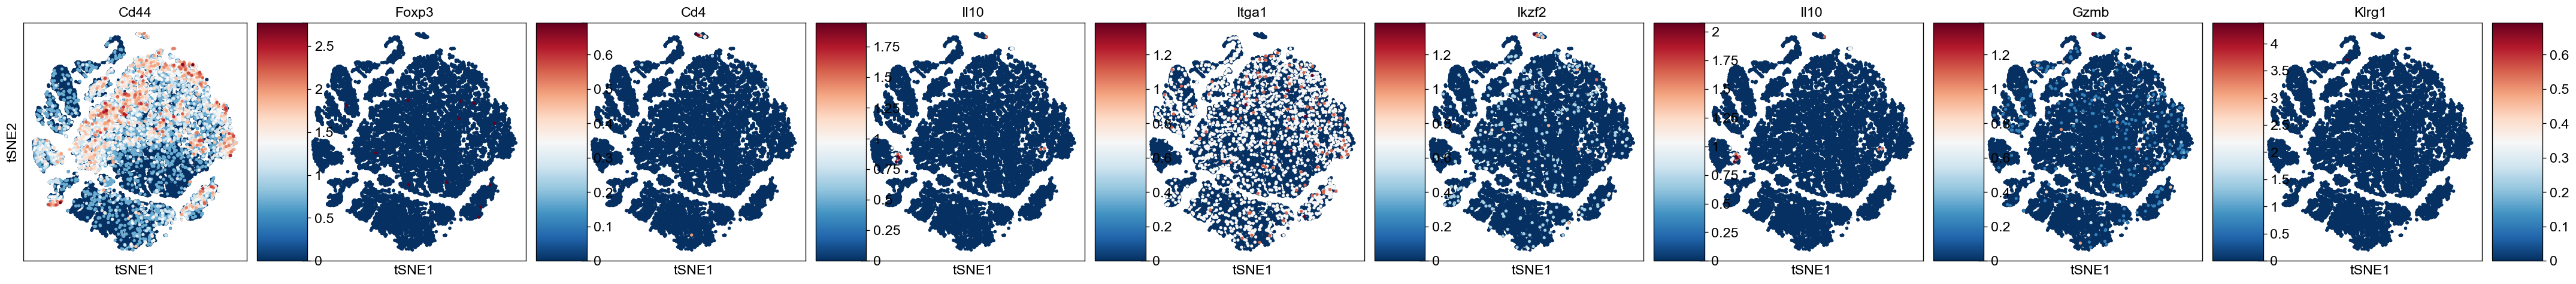

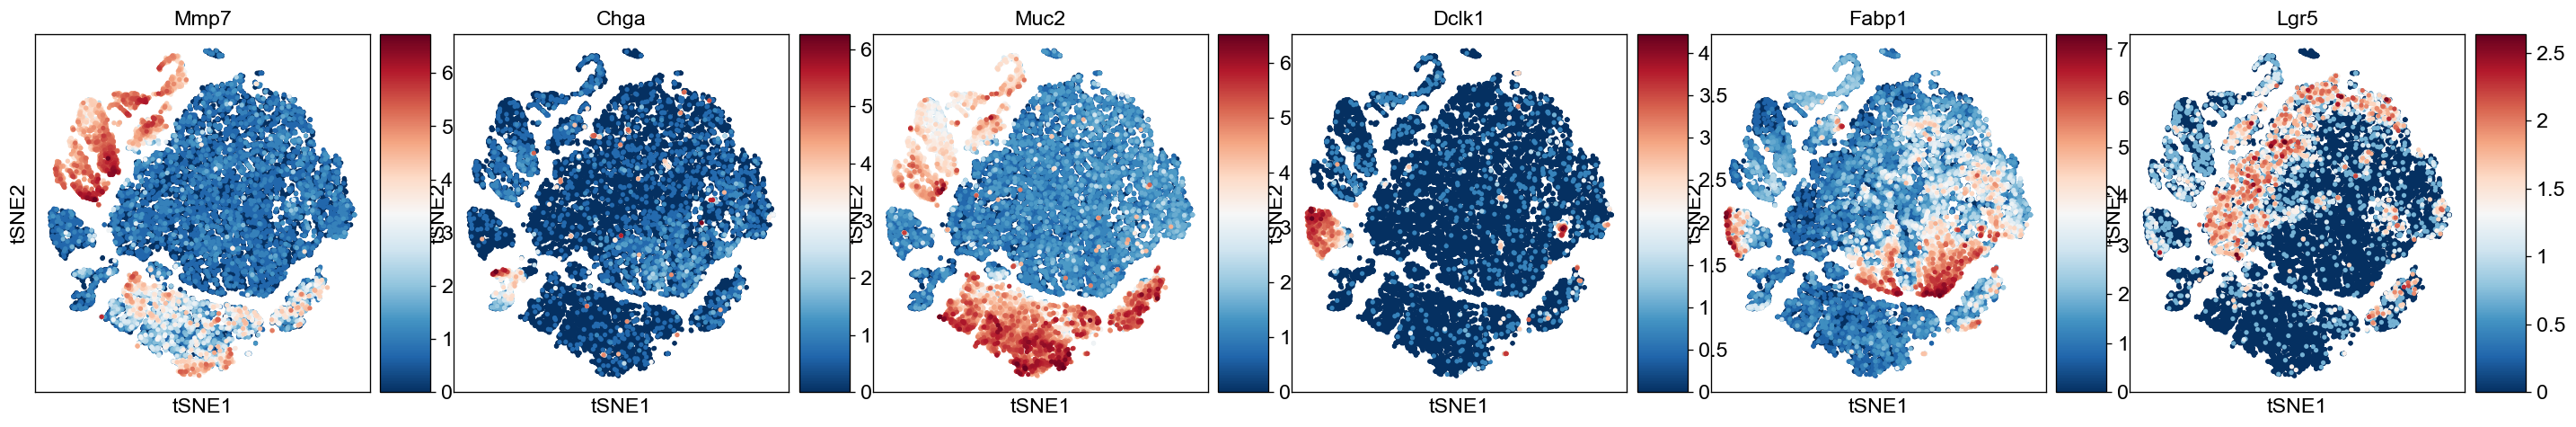

In [47]:
sc.pl.tsne(adata_all_log, color=['Cd44','Foxp3','Cd4','Il10','Itga1','Ikzf2','Il10','Gzmb','Klrg1'], color_map='RdBu_r', size=40)
sc.pl.tsne(adata_all_log, color=['Mmp7','Chga','Muc2','Dclk1','Fabp1','Lgr5'], color_map='RdBu_r', size=40)

In [48]:
sc.tl.louvain(adata_all_log)

running Louvain clustering
    using "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9979771972  0.9965235591  0.9943953753  0.9922546744
      0.9916366935  0.9849812984  0.9848394394  0.9826824069  0.9760602117
      0.9669408798  0.9632711411  0.9619574547  0.9582006931  0.9578455687]
    using the "louvain" package of Traag (2017)
    finished (0:00:30.312): found 14 clusters and added
    'louvain_groups', the cluster labels (adata.smp, dtype=category)


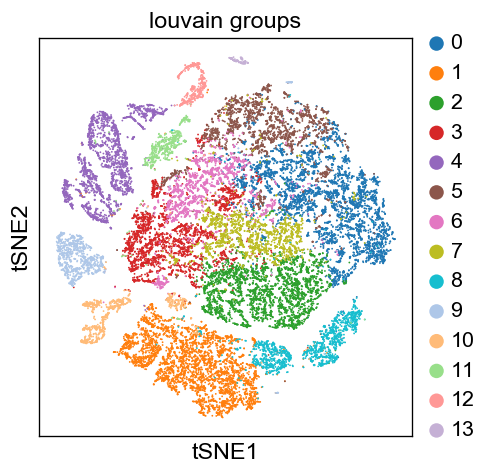

In [49]:
sc.pl.tsne(adata_all_log, color='louvain_groups')

In [ ]:
sub_cells = np.in1d(adata_all_log.smp['louvain_groups'], ['13'])
print(np.sum(sub_cells))
adata_all_log=adata_all_log[np.invert(sub_cells),:]

# FOXA2 mice - scanpy v.1.0.4

In [ ]:
def qc_metrics(adata):
    adata.var["mean"] = adata.X.mean(axis=0).T
    adata.var["frac_zeros"] = (adata.X.shape[0] - (adata.X > 0).sum(axis=0).T) / adata.X.shape[0]
    mito_genes = np.array([name for name in adata.var_names if name.startswith('mt-')])
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    ribo_genes = np.array([name for name in adata.var_names if name.startswith('Rp')])
    # for each cell compute fraction of counts in mito genes vs. all genes
    adata.obs['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

    # add the total counts per cell as sample annotation to adata
    adata.obs['n_counts'] = np.sum(adata.X, axis=1).A1
    adata.obs['n_genes'] = np.sum(adata.X > 0, axis=1).A1
    print(len(adata.obs_names))
    
    return(adata)

def cell_filter(adata,countmin):
    res_cells = sc.pp.filter_cells(adata.X,min_counts=countmin,copy=True)

    res_genes = sc.pp.filter_cells(adata.X,min_genes=1000,copy=True)

    res_all = np.array([any(tup) for tup in zip(res_cells[0], res_genes[0])])
    adata_filt=adata.copy()[res_all,:]
    print(adata_filt.n_smps)
    
    return(adata_filt)

In [ ]:
# filtered data (cell barcodes defined by Cellranger)
filename_data_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/mm10/matrix.mtx'
filename_genes_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/mm10/genes.tsv'
filename_barcodes_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/mm10/barcodes.tsv'

adata_CD_1 = sc.read(filename_data_CD_1, cache=True).transpose()
adata_CD_1.var_names = np.genfromtxt(filename_genes_CD_1, dtype=str)[:, 1]
adata_CD_1.obs_names = np.genfromtxt(filename_barcodes_CD_1, dtype=str)

adata_CD_1.var_names_make_unique

# raw data (all barcodes)
filename_data_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_1 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_1/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_1_raw = sc.read(filename_data_CD_1, cache=True).transpose()
adata_CD_1_raw.var_names = np.genfromtxt(filename_genes_CD_1, dtype=str)[:, 1]
adata_CD_1_raw.obs_names = np.genfromtxt(filename_barcodes_CD_1, dtype=str)

adata_CD_1_raw.var_names_make_unique


########


# filtered data (cell barcodes defined by Cellranger)
filename_data_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/mm10/matrix.mtx'
filename_genes_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/mm10/genes.tsv'
filename_barcodes_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/mm10/barcodes.tsv'

adata_CD_2 = sc.read(filename_data_CD_2, cache=True).transpose()
adata_CD_2.var_names = np.genfromtxt(filename_genes_CD_2, dtype=str)[:, 1]
adata_CD_2.obs_names = np.genfromtxt(filename_barcodes_CD_2, dtype=str)

adata_CD_2.var_names_make_unique


# raw data (all barcodes)
filename_data_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_2 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_2/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_2_raw = sc.read(filename_data_CD_2, cache=True).transpose()
adata_CD_2_raw.var_names = np.genfromtxt(filename_genes_CD_2, dtype=str)[:, 1]
adata_CD_2_raw.obs_names = np.genfromtxt(filename_barcodes_CD_2, dtype=str)


adata_CD_2_raw.var_names_make_unique


############

# filtered data (cell barcodes defined by Cellranger)
filename_data_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/mm10/matrix.mtx'
filename_genes_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/mm10/genes.tsv'
filename_barcodes_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/mm10/barcodes.tsv'

adata_CD_3 = sc.read(filename_data_CD_3, cache=True).transpose()
adata_CD_3.var_names = np.genfromtxt(filename_genes_CD_3, dtype=str)[:, 1]
adata_CD_3.obs_names = np.genfromtxt(filename_barcodes_CD_3, dtype=str)

adata_CD_3.var_names_make_unique


# raw data (all barcodes)
filename_data_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/raw_gene_bc_matrices/mm10/matrix.mtx'
filename_genes_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/raw_gene_bc_matrices/mm10/genes.tsv'
filename_barcodes_CD_3 = '/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/CD_3/raw_gene_bc_matrices/mm10/barcodes.tsv'

adata_CD_3_raw = sc.read(filename_data_CD_3, cache=True).transpose()
adata_CD_3_raw.var_names = np.genfromtxt(filename_genes_CD_3, dtype=str)[:, 1]
adata_CD_3_raw.obs_names = np.genfromtxt(filename_barcodes_CD_3, dtype=str)
adata_CD_3_raw.var_names_make_unique

In [ ]:
### QC and cell filtering
adata_CD_1=qc_metrics(adata_CD_1)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_1.obs['n_counts'])
adata_CD_1_filt= cell_filter(adata_CD_1_raw,countmin)
adata_CD_1_filt=qc_metrics(adata_CD_1_filt)

adata_CD_1_filt = adata_CD_1_filt[adata_CD_1_filt.obs['percent_mito'] < 0.1, :]
adata_CD_1_filt=qc_metrics(adata_CD_1_filt)

In [ ]:
### QC and cell filtering
adata_CD_2=qc_metrics(adata_CD_2)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_2.obs['n_counts'])
adata_CD_2_filt= cell_filter(adata_CD_2_raw,countmin)
adata_CD_2_filt=qc_metrics(adata_CD_2_filt)

adata_CD_2_filt = adata_CD_2_filt[adata_CD_2_filt.obs['percent_mito'] < 0.1, :]
adata_CD_2_filt=qc_metrics(adata_CD_2_filt)

In [ ]:
### QC and cell filtering
adata_CD_3=qc_metrics(adata_CD_3)

# count threshold from Cellranger filtering (minimal total count)
countmin = min(adata_CD_3.obs['n_counts'])
adata_CD_3_filt= cell_filter(adata_CD_3_raw,countmin)
adata_CD_3_filt=qc_metrics(adata_CD_3_filt)

adata_CD_3_filt = adata_CD_3_filt[adata_CD_3_filt.obs['percent_mito'] < 0.1, :]
adata_CD_3_filt=qc_metrics(adata_CD_3_filt)

In [ ]:
adata_CD_1_filt.var_names_make_unique()
adata_CD_2_filt.var_names_make_unique()
adata_CD_3_filt.var_names_make_unique()

In [ ]:
adata_all=adata_CD_1_filt.concatenate([adata_CD_2_filt, adata_CD_3_filt],
                                       batch_key='sample',
                                       batch_categories=['CD_1', 'CD_2', 'CD_3'])

In [ ]:
sc.pp.filter_genes(adata_all, min_cells=20)
adata_all=qc_metrics(adata_all)

In [ ]:
sc.write('/Users/sophie/Documents/ICB/Projects/2017_10X_HFD/data/scanpy/control_only_new_filter_all_vers_1_0.h5',adata_all)